In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

## [DSO] Machine Learning Seminar Vol.1
2020-02-13  
SKUE

In [164]:
Image(url="https://image.yodobashi.com/product/100/000/009/002/935/105/100000009002935105_10204.jpg")

## Chapter1：「データから学習する能力」をコンピュータに与える
+ 機械学習の一般概念
+ 3種類の学習と基本用語
+ 機械学習システムをうまく設計するための構成要素
+ データ解析と機械学習のためのPythonのインストールとセットアップ

### 機械学習の一般概念
+ 機械学習はデータの意味を理解するアルゴリズムの応用と科学とされている。蓄積されたデータから意味を見出し知識に変えることができる。
+ 機械学習は人工知能の一分野として発展し、データを分析してルールを導き出すなどを人手を介さずに行えるようにした。

### 3種類の学習と基本用語
機械学習は大きく分けて3種類ある
+ 教師あり学習
+ 教師なし学習
+ 強化学習

#### 教師あり学習
ラベル付けされたトレーニングデータからモデルを学習し、未知のデータを予測できるようにすることを目標とした機械学習。目的関数として真のラベルとの誤差二乗和などを取り、それらの最適化を行う。

+ 分類（バイナリ、マルチクラス）：離散値が教師データ。
+ 回帰：連続値が教師データ。

In [2]:
Image(url= "https://miro.medium.com/max/977/1*DjUEt5--t6lCjYG_MuZlLg.png")

In [3]:
Image(url= "https://www.simplilearn.com/ice9/free_resources_article_thumb/iris-flower-dataset-graph.JPG")

In [7]:
Image(url= "https://chanakya.ca/wp-content/uploads/2018/05/EstimateMultipleLinearRegressionCoefficientsExample_01.png")

#### 教師なし学習
ラベル付けされていないデータをもとにデータの構造を抽出するための機械学習。
+ クラスタリング：階層クラスタリング、非階層クラスタリング（k-means）
+ 次元圧縮：PCA

In [9]:
Image(url="https://miro.medium.com/max/977/1*5f8VujKLQKhQZRafA2t9hw.png")

In [10]:
Image(url="https://i.stack.imgur.com/cIDB3.png")

In [11]:
Image(url="https://media-exp1.licdn.com/dms/image/C5112AQH8fVr68cq-bg/article-cover_image-shrink_600_2000/0?e=1586390400&v=beta&t=1UOWDxRamUEQGGxE6z-z4w_ukZWZyzVk0lqhS3b-cVI")

#### 強化学習
+ エージェントが環境とのやり取りを通じて報酬の最大化をする学習方法。
+ 教師あり学習は正例や負例を当てることを目的関数として学習していたが、強化学習では報酬という目的関数をおいてそれの最適化を行う。
 + ゲームにおける報酬は「勝ち負け」
 + Webサービスにおける報酬は「コンバージョン」
 + 自動運転における報酬は「安心走行（非定量的）」

In [8]:
Image(url= "https://xaltius.tech/wp-content/uploads/2019/07/Machine-Learning-Explained3.png")

#### 基本用語
+ 特徴量：分析対象のデータセットからラベルを除いたもの。（属性、計測値など）
  + 線形代数（特徴量全体は行列、各々の特徴量はベクトル）
+ サンプル：機械学習で扱うデータセットのこと。インスタンスとも観測とも呼ぶ。
+ ラベル：教師データのこと。ターゲットとも呼ぶ。

### 機械学習システムを構築するためのロードマップ
+ 1.前処理：トレーニングデータセットとテストデータセットを作る工程。
 + 特徴抽出やスケーリング
 + 特徴選択
 + 次元削減
 + サンプリング
+ 2.学習：アルゴリズムの工程。
 + 機械学習のモデル選択：モデルは数え切れないほどある。
 + 交差検証（クロスバリデーション）：交差検証のやり方も様々ある。
 + 性能指標：指標も様々。
 + ハイパーパラメータ最適化：最適化の方法も様々。
+ 3.評価
 + テストデータセットを使った最終モデルの評価（二度漬け禁止）
   + kaggleで言うとPrivate Score用のデータセットに該当。
+ 4.予測
 + 新しいデータにモデルを適用して予測する。それを任意のアプリケーションで用いる。

### データ解析と機械学習のためのPythonのインストールとセットアップ
+ 教科書ではAnacondaがおすすめされているが、Google Colabで良いと思われる。
+ データサイエンス系のパッケージ
 + NumPy
 + pandas
 + matplotlib
 + SciPy
 + scikit-learn

## Chapter2：分類問題 - 単純な機械学習アルゴリズムのトレーニング
+ パーセプトロン
+ ADALINE
+ 勾配降下法
+ 勾配降下法とスケーリング
+ 確率的勾配降下法

### パーセプトロン
+ 人工ニューロン
+ パーセプトロンの学習規則
+ Pythonでの実装

#### 人工ニューロン
zを総入力、xを入力値、wを重みベクトルとする。
$$
    z = w^T  x = w_1 x_1 + \dots + w_m x_m
$$
以下の単位ステップ関数を定義する。
$$
    \phi(z) =
        \begin{cases}
            1 \quad z \geqq \theta \\
            -1 \quad z < \theta \\
        \end{cases}
$$

$$なお、\theta　は閾値となっている。$$

これを決定関数と呼ぶ。  
まら、閾値を左辺に移動し、インデックス0の重みを
$$w_0 = - \theta \\
x_0 = 1
$$
として改めてパーセプトロンを定義すると。  

$$
    z = w^T  x =w_0 x_0+  w_1 x_1 + \dots + w_m x_m \\
    \phi(z) =
        \begin{cases}
            1 \quad z \geqq 0 \\
            -1 \quad z < 0 \\
        \end{cases}
$$
で表すことができる。この負の閾値、
$$w_0 = -\theta$$
のことをバイアスユニットと呼ぶ。

#### パーセプトロンの学習規則
+ 1.重みを0または値の小さい乱数で初期化する。
+ 2.トレーニングサンプルごとに以下の手順を実行する。
 + 2-1.出力値を計算する（単位ステップ関数による予測）
 + 2-2.重みを更新する
 
$$
    z = w^T  x = w_1 x_1 + \dots + w_m x_m
$$
における重みの更新は
$$
w_j := w_j + \Delta w_j \\
\Delta w_j = \eta ( y^{(i)} - \hat y ^{(i)} ) x^{(i)}_j
$$
に従って行われる。ηは学習率で0.0〜1.0以下の定数がおかれる。 
yの真の値と予測値との間で差異があれば重みを更新するという仕組みになっている。  
これらはベクトルなので、各々の要素がこの更新式によって同時に更新されることとなる。

#### パーセプトロンの学習規則の思考実験
+ 正しくラベルを予測した場合
$$
\Delta w_j = \eta (-1 - (-1)) x^{(i)}_j = 0 \\
\Delta w_j = \eta (1 - 1)) x^{(i)}_j = 0
$$

+ 予測が間違っていた場合（その1）：xが小さいケース（η=1）
$$
\Delta w_j = \eta (1 - (-1)) x^{(i)}_j = \eta 2 x^{(i)}_j = 1 \times 2 \times 0.5 = 1\\
\Delta w_j = \eta (-1 - 1)) x^{(i)}_j = - \eta 2 x^{(i)}_j = - 1 \times 2 \times 0.5 = -1
$$

+ 予測が間違っていた場合（その2）：xが大きいケース（η=1）
$$
\Delta w_j = \eta (1 - (-1)) x^{(i)}_j = \eta 2 x^{(i)}_j = 1 \times 2 \times 2 = 4\\
\Delta w_j = \eta (-1 - 1)) x^{(i)}_j = - \eta 2 x^{(i)}_j = - 1 \times 2 \times 2 = -4
$$

このように誤分類したとして、xの値や学習率によって大きく重みの更新がなされることになる。なお、パーセプトロンが収束するケースは、2つのクラスが線形分離可能で学習率が十分に小さいときに限られる。  
線形分離が不能な場合は、トレーニングの最大回数（エポック）や誤分類の最大数を設定することで重み付けの更新を終了させる。

In [13]:
Image(url="https://raw.githubusercontent.com/qingkaikong/blog/master/40_ANN_part3_step_by_step_MLP/figures/figure1_Perceptron_limitation.jpg")

#### Pythonでの実装

In [14]:
Image(url="https://www.simplilearn.com/ice9/free_resources_article_thumb/symbolic-representation-of-perceptron-learning-rule.jpg")

In [23]:
import numpy as np
class Perceptron(object): # クラスの定義    
    # クラスからインスタンスを生成した際に、自動的に呼び出されるメソッドのこと
    def __init__(self,  # selfは関数として再利用する際に必要な指定。以下を見ていけばselfに様々な値を持たせて関数間で利用しているのがわかる。
                             eta=0.01, # 学習率
                             n_iter=50, # 反復回数
                             random_state=1 # 乱数シード
                          ):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) # 乱数の生成
        self.w_ = rgen.normal(loc=0.0, # 分布の中心（平均）
                                               scale=0.01, # 分布の標準偏差
                                               size=1 + X.shape[1] # 出力する際のサイズ。最初の1はバイアスユニットを意味する。（X.shape[1] で変数の数が返される。）
                                             )
        self.errors_ = [] # 誤差の空箱
        
        for _ in range(self.n_iter): # 反復回数だけ繰り返す。この場合、_に意味はない。
            errors = 0
            for xi, target in zip(X, y): # zipは繰り返し処理できるような形に変換してくれる関数。インスタンスの数だけ繰り返される。
                update = self.eta * (target - self.predict(xi)) # 前述の更新式そのまま
                self.w_[1:] += update * xi # 重みの更新
                self.w_[0] += update # バイアスユニットはxiが1の設定なので別で更新
                errors += int(update != 0.0)  # 誤差が0でなければ整数にして足す。
            self.errors_.append(errors) # 反復するごとに誤差をappendする。
        return self # 誤差や重みが伴った値を返す
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # 内積の計算
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 単位ステップ関数

In [84]:
'''
import numpy as np
class Perceptron(object): # クラスの定義    
    # クラスからインスタンスを生成した際に、自動的に呼び出されるメソッドのこと
    def __init__(self,  # selfは関数として再利用する際に必要な指定。以下を見ていけばselfに様々な値を持たせて関数間で利用しているのがわかる。
                             eta=0.01, # 学習率
                             n_iter=50, # 反復回数
                             random_state=1 # 乱数シード
                          ):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state''';

In [86]:
'''
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) # 乱数の生成
        self.w_ = rgen.normal(loc=0.0, # 分布の中心（平均）
                                               scale=0.01, # 分布の標準偏差
                                               size=1 + X.shape[1] # 出力する際のサイズ。最初の1はバイアスユニットを意味する。（X.shape[1] で変数の数が返される。）
                                             )
        self.errors_ = [] # 誤差の空箱
        
        for _ in range(self.n_iter): # 反復回数だけ繰り返す。この場合、_に意味はない。
            errors = 0
            for xi, target in zip(X, y): # zipは繰り返し処理できるような形に変換してくれる関数。インスタンスの数だけ繰り返される。
                update = self.eta * (target - self.predict(xi)) # 前述の更新式そのまま
                self.w_[1:] += update * xi # 重みの更新
                self.w_[0] += update # バイアスユニットはxiが1の設定なので別で更新
                errors += int(update != 0.0)  # 誤差が0でなければ整数にして足す。
            self.errors_.append(errors) # 反復するごとに誤差をappendする。
        return self # 誤差や重みが伴った値を返す
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # 内積の計算
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 単位ステップ関数
''';

#### パーセプトロンモデルのトレーニング

In [27]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


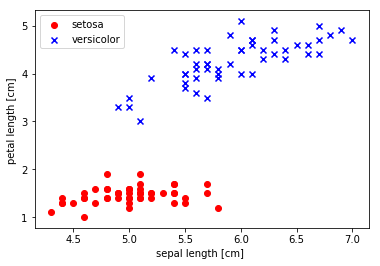

In [40]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values # 目的変数の抽出
y = np.where(y == 'Iris-setosa', -1, 1) # 正例と負例の指定
X = df.iloc[0:100, [0, 2]].values # 1-100行目の1,3列目の抽出
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa');
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor');
plt.xlabel('sepal length [cm] ');
plt.ylabel('petal length [cm] ');
plt.legend(loc='upper left');
plt.show()

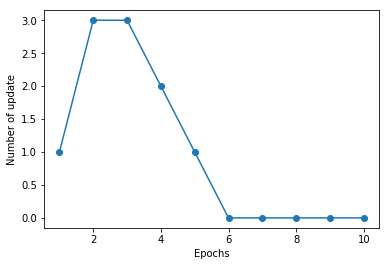

In [45]:
ppn = Perceptron(eta=0.1, n_iter=10) # defaultの値はeta=0.01, n_iter=50
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o');
plt.xlabel('Epochs');
plt.ylabel('Number of update');
plt.show()

In [60]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v') # マーカー
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # 色
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Colormap object generated from a list of colors.
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 領域を描くに際して最大値、最小値の情報を取得
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # Return coordinate matrices from coordinate vectors.
                                              np.arange(x2_min, x2_max, resolution)) # resolutionはgridの1単位に該当する
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravelで1次元のベクトルにして転置して予測
    Z = Z.reshape(xx1.shape)  # Zはただのベクトルなのでxx1と同じデータ構造に変換する
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) # 等高線を描く
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)): # enumerateは引数にリストなどのイテラブルオブジェクトを指定すると、インデックス番号(idx)と要素(cl)が取得できる。
        plt.scatter(x = X[y == cl, 0],
                            y = X[y == cl, 1],
                            alpha = 0.8,
                            c = colors[idx],
                            marker=markers[idx],
                            label=cl,
                            edgecolor='black'
                            )        

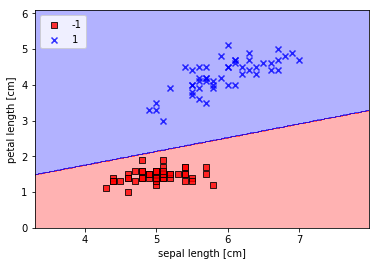

In [61]:
plot_decision_regions(X, y, classifier=ppn) # 決定領域のプロット
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### ADALINE
+ 単層ニューラルネットワーク。
+ パーセプトロンの改良版。重みの更新方法がパーセプトロンと異なり、線形活性化関数に基づいてなされる。
+ ただし最終的な予測にはパーセプトロンと同様に閾値関数を用いている。
+ パーセプトロンとの違いとして誤差の計算が線形活性化関数の出力値と真のラベルとなっている点があげられる。
+ ADALINEの学習規則はWidrow-Hoff則と呼ばれる。
 + 二乗損失の最小化を最急降下法で解くことを指す。

In [62]:
Image(url="https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png")

#### 勾配降下法
機械学習の学習過程において目的関数を最適化するための手法の一つ。  
今回のADALINEの場合は重みの学習に以下のコスト関数（誤差平方和）を用いる。
$$
J(W) = \frac{1}{2} \sum _i (y^{(i)} - \phi (z^{(i)}))^2
$$
この関数は凸関数であり、微分可能であることから、勾配降下法を用いて最小化することができる。  
この目的関数における重みの更新は
$$
w := w + \Delta w \\
\Delta w = - \eta \nabla J (w)
$$
で行われる。勾配の負値、つまり反対向きにパラメータを更新することに注目されたい。∇ J(w)の各要素については  
$$
\frac{\partial J}{\partial w_j} = - \sum_i (y^{(i)} - \phi (z^{(i)}) )x^{(i)}_j
$$
よって、更新式は以下のように表される。  
$$
\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta  \sum_i (y^{(i)} - \phi (z^{(i)}) )x^{(i)}_j
$$
summationから、重みの更新のために他のインスタンスを同時につかっていることがわかる。これ故に、バッチ勾配降下法と呼ばれている。  
また、活性化関数の出力が整数ではなく、実数であることもパーセプトロンとの違いである。

#### Pythonでの実装

In [135]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,
                                               scale=0.01,
                                               size=1+X.shape[1]
                                               )
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input) # 活性化関数
            errors = (y - output) # 誤差
            self.w_[1:] += self.eta * X.T.dot(errors) # 重みの更新（更新式に従っている）
            self.w_[0] += self.eta * errors.sum() # バイアスユニットだけ別で重みの更新
            cost = (errors**2).sum() / 2.0 # 誤差二乗和を2で割ったもの（アルゴリズムが収束したかどうかの判断に使う。）
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # 内積の計算
    
    def activation(self, X): 
        return X # 線形活性化関数（今回は何も意味を持たない。次章以降でロジスティック回帰モデルの説明でこことの比較がなされる。）
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1) # 単位ステップ関数

In [136]:
'''class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        ''';

In [137]:
'''
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,
                                               scale=0.01,
                                               size=1+X.shape[1]
                                               )
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input) # 活性化関数
            errors = (y - output) # 誤差
            self.w_[1:] += self.eta * X.T.dot(errors) # 重みの更新（更新式に従っている）
            self.w_[0] += self.eta * errors.sum() # バイアスユニットだけ別で重みの更新
            cost = (errors**2).sum() / 2.0 # 誤差二乗和を2で割ったもの（アルゴリズムが収束したかどうかの判断に使う。）
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # 内積の計算
    
    def activation(self, X): 
        return X # 線形活性化関数（今回は何も意味を持たない。次章以降でロジスティック回帰モデルの説明でこことの比較がなされる。）
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1) # 単位ステップ関数
''';

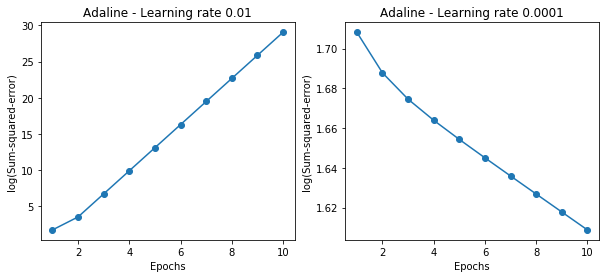

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o');
ax[0].set_xlabel('Epochs');
ax[0].set_ylabel('log(Sum-squared-error)');
ax[0].set_title('Adaline - Learning rate 0.01');

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o');
ax[1].set_xlabel('Epochs');
ax[1].set_ylabel('log(Sum-squared-error)');
ax[1].set_title('Adaline - Learning rate 0.0001');
plt.show()

In [139]:
Image(url="https://algorithmia.com/blog/wp-content/uploads/2018/05/word-image-2.png")

#### スケーリング
+ 標準化
 + 各特徴量の平均をずらして中心が0になるようにして、各特徴量の標準偏差を1にする。
 
 $$
 x^{'}_j = \frac{x_j - \mu _j}{\sigma _j}
 $$
 μ_jはサンプルの平均で、それをすべてのトレーニングサンプルから引き、  
 サンプルの標準偏差σ_jで割ることで標準化を行うことができる。  
 
   
   
+ 標準化が勾配降下法による学習に役立つ理由
 + 探索空間が限られ、大局的最小値を見つけ出すためのステップ数が少なくて済むため。

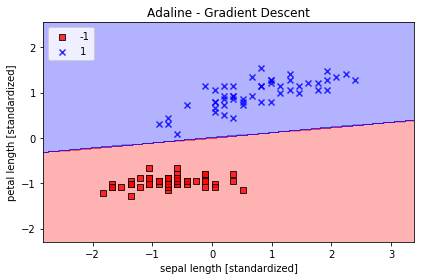

In [140]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent');
plt.xlabel('sepal length [standardized]');
plt.ylabel('petal length [standardized]');
plt.legend(loc='upper left');
plt.tight_layout();
plt.show()

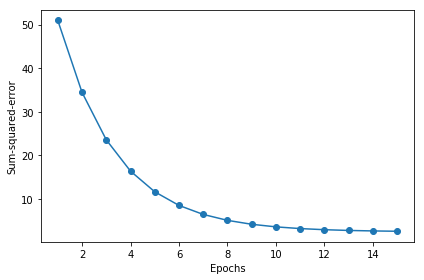

In [152]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs');
plt.ylabel('Sum-squared-error');
plt.tight_layout();
plt.show()

標準化すれば、η = 0.01でトレーニングしても収束していくことがわかる。  
ただし、全て分類できても誤差平方和は0にはなっていない。

#### 確率的勾配降下法
+ 勾配降下法の問題点
 + バッチ勾配降下法においては数百万のトレーニングサンプルがあったとして、そのすべてを同時に扱って重みの更新を行うため計算コストが高くついてしまう可能性がある。

勾配降下法を再掲する。
$$
\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta  \sum_i (y^{(i)} - \phi (z^{(i)}) )x^{(i)}_j
$$
このsummationが問題となる。  
そこで、確率的勾配降下法ではトレーニングサンプルごとに段階的に重みを更新する。
$$
\eta (y^{(i)} - \phi (z^{(i)}) )x^{(i)}
$$
トレーニングサンプルごとに重み更新するに際して、トレーニングサンプルをランダムな順序に並べ替えることが重要となる。偏りがある場合、段階的にやったとしても重みベクトルが更新前と更新後で同じ値になる可能性がある。

#### Pythonでの実装

In [116]:
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1]) # 重みの初期化
        self.cost_ = [] # コストの空箱1
        for i in range(self.n_iter):
            if self.shuffle: # shuffleに関するBoolean。
                X, y = self._shuffle(X, y) # インスタンスをシャッフルしたもの
            cost = [] # コストの空箱2
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi,target)) # 一つずつ更新式に従って更新した際のコストの値を返す
            avg_cost = sum(cost)/len(y) # 平均コストを計算する
            self.cost_.append(avg_cost) # 平均コストをappendする
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1]) # 重みの初期化
        if y.ravel().shape[0] > 1: # yの数が1よりも大きい場合
            for xi, target  in zip(X, y):
                self._update_weights(xi,target) # 繰り返して重みベクトルを更新
        else:
            self._update_weights(X, y) # yが1個しかない場合は1回だけ重みベクトルを更新
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y)) # 並び替えられたインスタンスのインデックス
        return X[r], y[r]
    
    def _initialize_weights(self, m): # 重みの初期化
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi)) # 活性化関数
        error = (target - output) # 誤差
        self.w_[1:] += self.eta * xi.dot(error) # 更新式に従って重みベクトルの更新
        self.w_[0] += self.eta*error # バイアスユニットだけ別で更新
        cost = 0.5 * error**2 # 誤差二乗和を計算し2で割る。
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [161]:
'''
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1]) # 重みの初期化
        self.cost_ = [] # コストの空箱1
        for i in range(self.n_iter):
            if self.shuffle: # shuffleに関するBoolean。
                X, y = self._shuffle(X, y) # インスタンスをシャッフルしたもの
            cost = [] # コストの空箱2
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi,target)) # 一つずつ更新式に従って更新した際のコストの値を返す
            avg_cost = sum(cost)/len(y) # 平均コストを計算する
            self.cost_.append(avg_cost) # 平均コストをappendする
        return self
''';

In [162]:
'''
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1]) # 重みの初期化
        if y.ravel().shape[0] > 1: # yの数が1よりも大きい場合
            for xi, target  in zip(X, y):
                self._update_weights(xi,target) # 繰り返して重みベクトルを更新
        else:
            self._update_weights(X, y) # yが1個しかない場合は1回だけ重みベクトルを更新
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y)) # 並び替えられたインスタンスのインデックス
        return X[r], y[r]
    
    def _initialize_weights(self, m): # 重みの初期化
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
''';

In [163]:
'''
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi)) # 活性化関数
        error = (target - output) # 誤差
        self.w_[1:] += self.eta * xi.dot(error) # 更新式に従って重みベクトルの更新
        self.w_[0] += self.eta*error # バイアスユニットだけ別で更新
        cost = 0.5 * error**2 # 誤差二乗和を計算し2で割る。
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
''';

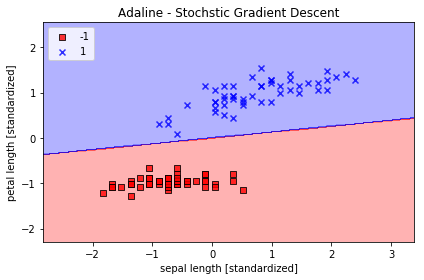

In [129]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochstic Gradient Descent');
plt.xlabel('sepal length [standardized]');
plt.ylabel('petal length [standardized]');
plt.legend(loc='upper left');
plt.tight_layout();
plt.show()

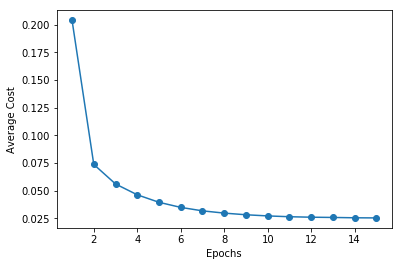

In [125]:
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o');
plt.xlabel('Epochs');
plt.ylabel('Average Cost');
plt.show()

SGDを使うことで、少ないエポック数でコストを低減させることができている。  
15エポックを過ぎると勾配降下法と同じ水準になる。　　

少ないエポック数で済むことから、オンライン機械学習など計算リソースが限られた環境においてSGDを使う便益がある。

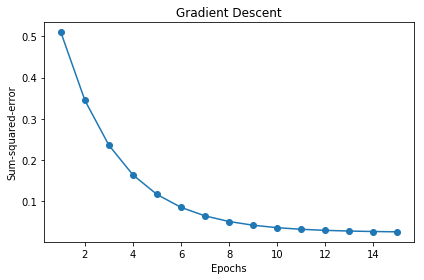

In [155]:
plt.plot(range(1, len(ada.cost_) + 1), [ cost/100 for cost  in ada.cost_ ], marker='o')
plt.xlabel('Epochs');
plt.ylabel('Sum-squared-error');
plt.title('Gradient Descent');
plt.tight_layout();
plt.show()

オンライン機械学習においてストリーミングデータを使って更新したい場合は以下のように記述する。

In [158]:
ada_sgd.partial_fit(X_std[0, :], y[0]).w_

array([ 4.41172074e-04, -1.38669086e-01,  1.07241511e+00])

In [159]:
ada_sgd.partial_fit(X_std[1, :], y[1]).w_

array([ 7.47750008e-05, -1.38341414e-01,  1.07278677e+00])

In [160]:
ada_sgd.partial_fit(X_std[2, :], y[2]).w_

array([ 2.97143635e-05, -1.38287001e-01,  1.07283560e+00])

## 参考情報
+ http://ibisforest.org/index.php?Widrow-Hoff%E3%81%AE%E5%AD%A6%E7%BF%92%E8%A6%8F%E5%89%87
+ https://speakerdeck.com/kirikisinya/xin-zhe-renaiprmlmian-qiang-hui-at-ban-zang-men-number-3